# Evaluate model for Vietnamese Stock Env

In [1]:
import os
from pathlib import Path
path = Path(os.getcwd())
os.chdir(path.parent.absolute())

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import pandas_ta as ta
from stable_baselines3.dqn import DQN
from stable_baselines3.ppo import PPO
import gym
import matplotlib.pyplot as plt
from stable_baselines3.common.evaluation import evaluate_policy
import mt4_hst
import stock_env
from stock_env.utils import *
from stock_env.envs.vn_stock_env import VietnamStockEnv, VietnamStockV2Env
from stable_baselines3.common.env_checker import check_env
%matplotlib inline

In [25]:
ticker = 'CTG'
env = VietnamStockV2Env(
    df=mt4_hst.read_hst("../stock_datasets/" + ticker + "1440.hst"),
    max_trade_lot=5,
    max_lot=10,
    init_cash=100e3)
check_env(env)
# model = DQN.load("log/dqn_VietnamStockV2Env_" + ticker, env=env)
model = PPO.load("log/ppo_VietnamStockV2Env_" + ticker, env=env)

In [26]:
obs = env.reset()
env._start_tick = 0
done = False
while not done:
    action, _ = model.predict(obs, deterministic=True)
    # obs, _, done, _ = env.step(env.action_space.sample())
    obs, _, done, _ = env.step(action)
history_df = env.get_history()

In [34]:
df = pd.read_csv('temp/history/' + ticker + '.csv')
df.sort_values(by='time', inplace=True)
df.index = pd.to_datetime(df['time'])
portfolio_value = df['portfolio_value']
# portfolio_value = history_df['portfolio_value']

In [35]:
cols = "actions cash quantity cash nav portfolio_value avg_price close".split()
df[cols].head(50)
# history_df['actions'].describe()

,actions,cash,quantity,cash,nav,portfolio_value,avg_price,close
time,,,,,,,,
2011-09-20,0.0,738.409843,7300,738.409843,70343.055248,71081.465092,9.897478,9.636035
2011-09-21,0.0,738.409843,7300,738.409843,70343.055248,71081.465092,9.897478,9.636035
2011-09-22,0.0,738.409843,7300,738.409843,70615.701103,71354.110947,9.897478,9.673384
2011-09-23,0.0,738.409843,7300,738.409843,69525.110722,70263.520565,9.897478,9.523988
2011-09-26,0.0,738.409843,7300,738.409843,69252.464867,69990.874710,9.897478,9.486639
2011-09-27,0.0,738.409843,7300,738.409843,69797.756577,70536.166420,9.897478,9.561337
2011-09-28,0.0,738.409843,7300,738.409843,69252.464867,69990.874710,9.897478,9.486639
2011-09-29,0.0,738.409843,7300,738.409843,68707.166195,69445.576038,9.897478,9.411941
2011-09-30,0.0,738.409843,7300,738.409843,68707.166195,69445.576038,9.897478,9.411941


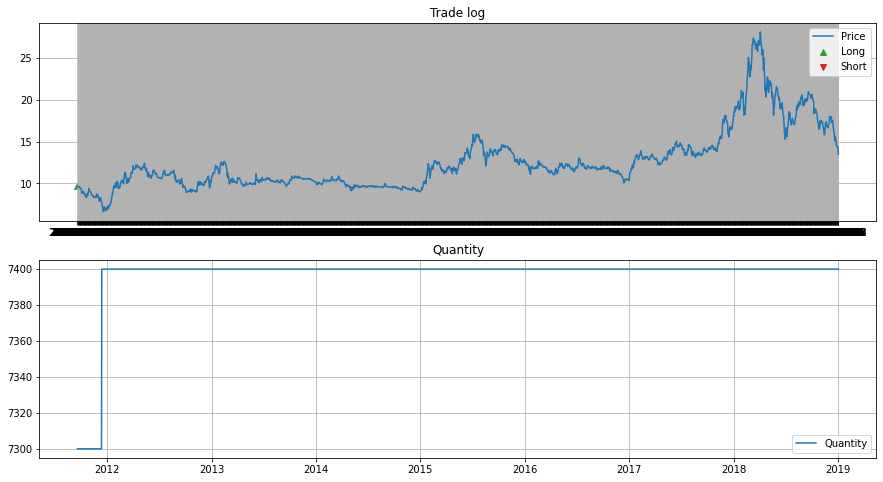

In [36]:
plot_trade_log_v2(df)


    Annual return     :  4.82%
    Cumulative return :  40.52%
    Sharpe ratio      :  0.31
    Maximum Drawdown  : -51.99%
    Annual Volatility :  32.49%
    Value-At-Risk     :  nan%
    


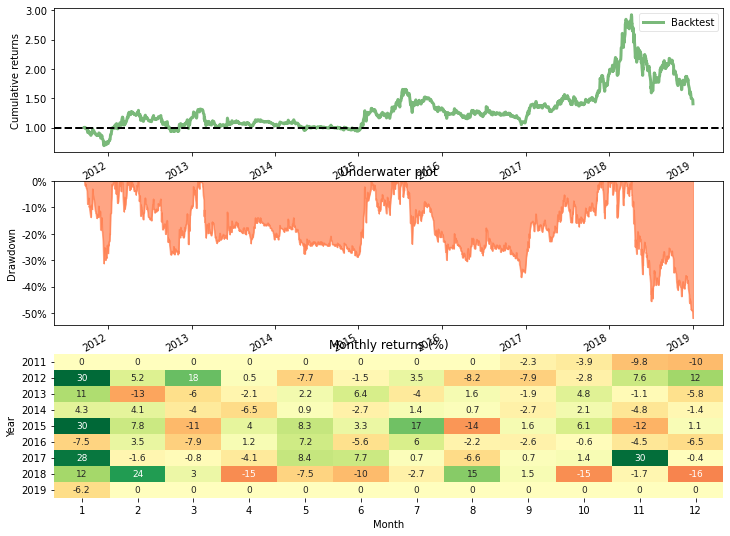

In [37]:
create_performance(portfolio_value.pct_change())